In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm

In [61]:
df=pd.read_csv(r'C:\Users\George.Macharia\Desktop\mlfiles\family.csv')
df.info(
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5 non-null      object 
 1   age     5 non-null      int64  
 2   height  5 non-null      float64
 3   color   5 non-null      object 
 4   gender  5 non-null      object 
 5   status  5 non-null      object 
 6   weight  5 non-null      int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 408.0+ bytes


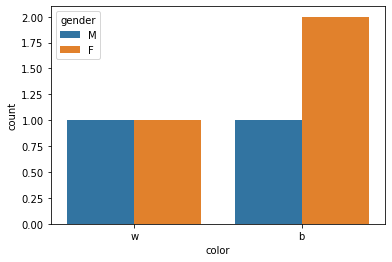

In [21]:
sns.countplot(x='color',hue='gender',data=df)

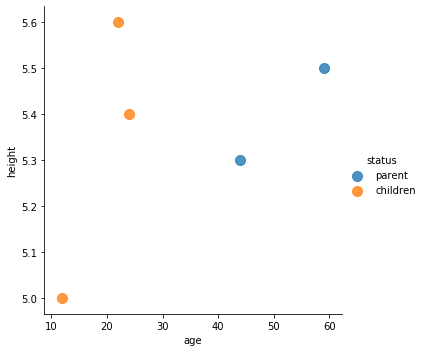

In [37]:
sns.lmplot('age','height',data=df,hue='status',fit_reg=False,scatter_kws={"s":100})

In [81]:
my_label=np.where(df['status']=='parent',0,1)
all_features=df.columns.values[1:].tolist()
basic_features=df[['weight','age']].values
basic_features
my_label

array([0, 0, 1, 1, 1])

In [63]:
model=svm.SVC(kernel='linear')
model.fit(basic_features,my_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
#hyperplane
w=model.coef_[0]
grad=-w[0]/w[1]
xx=np.linspace(10,100)
yy=grad*xx-((model.intercept_[0])/w[1])

#plotting the parallels to the separating hyperplane that passes through support vectors

b=model.support_vectors_[0]
yy_left=grad*xx+(b[1]-grad*b[0])
b=model.support_vectors_[-1]
yy_right=grad*xx-(b[1]-grad*b[0])


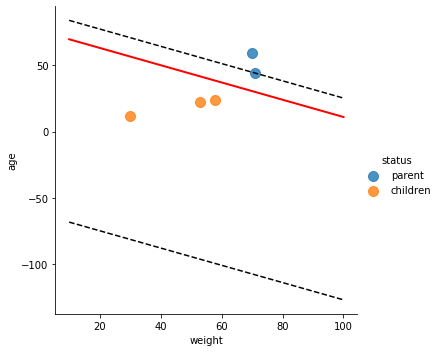

In [90]:
sns.lmplot('weight','age',data=df,hue='status',fit_reg=False,scatter_kws={"s":100})
plt.plot(xx,yy,linewidth=2,color='red')
plt.plot(xx,yy_left,'k--')
plt.plot(xx,yy_right,'k--')

In [91]:
def parentvchild(weight,age):
    if(model.predict(df[['weight','age']])==0):
        print('parent')
    else:
        print('child')
        
parentvchild(70,59)
        

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()